In [1]:
import json
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
import ast
import re
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import sklearn.manifold
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import os
%matplotlib inline

tweet_data = []
counter = 0

path = 'data_reservoir_sample/'
jsons = [jsonfile for jsonfile in os.listdir(path) if jsonfile.endswith('.json')]

# load in all json data files
for index, js in enumerate(jsons):
    with open(os.path.join(path, js)) as json_file:
        for line in json_file:
            tweet_data.append(json.loads(line))
            counter += 1

print(str(counter) + ' tweets loaded from json')

tweet_df = pd.DataFrame(tweet_data[0])

1 tweets loaded from json


In [2]:
tweet_text_df = pd.DataFrame()
tweet_text_df['text'] = [s.split() for s in tweet_df['text'] if isinstance(s, str)]

In [3]:
tweet_text_df

,text
0,"[Common:, Americas, Racism, Towards, Black, Pe..."
1,"[RT, @BlancsRAM19:, If, you, support, Trump,, ..."
2,"[Comment, tu, peux, passer, de, B.Obama, a, D...."
3,"[RT, @sarcasmcall:, 5., trump, vai, impedir, q..."
4,"[RT, @GMA:, WATCH:, Hundreds, of, protesters, ..."
5,"[WTF, !!, Donald, Trump, president, !, Shockin..."
6,"[RT, @evrack:, sorry, for, holding, the, presi..."
7,"[Funny, fact:, Hillary, isn't, the, one, who, ..."
8,"[RT, @GossipRoomOff:, Donald, #Trump, succède,..."
9,"[RT, @ABCPolitics:, More, than, 1,000, CA, hig..."


In [ ]:
# Silhouette Score: ran on smaller sample of 10,000 to determine good # of principal components = 5
# sample_ss = []
# sample_maxlen = len(sample_u)
# for k in range(1,20):
#     vectorsk = sample_u[:,:k] @ np.diag(sample_s[:k])
#     kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=10, random_state=0)
#     kmeans.fit_predict(vectorsk)
#     labelsk = kmeans.labels_
#     sample_ss.append(metrics.silhouette_score(vectorsk,labelsk,metric='euclidean'))
    
# plt.plot(range(1,20),sample_ss)
# plt.xlabel('No Principal Components',size=20)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
words = set(stopwords.words('english'))
words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', 'http','https','rt', 'la', 'que', 'de']) # remove it if you need punctuation 

vectorizer = TfidfVectorizer(stop_words=words, min_df=2000, max_df=0.8)
topics = [' '.join(strings) for strings in tweet_text_df['text']]
dtm = vectorizer.fit_transform(topics) #.toarray()

import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

stemmed_data = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)  
        for sent in sent_tokenize(message)
        for word in word_tokenize(sent))
        for message in topics]

dtm = vectorizer.fit_transform(stemmed_data)
terms = vectorizer.get_feature_names()

Created dense dtm matrix
Created centered dtm
Ran randomized_svd and assigned u, s, vt


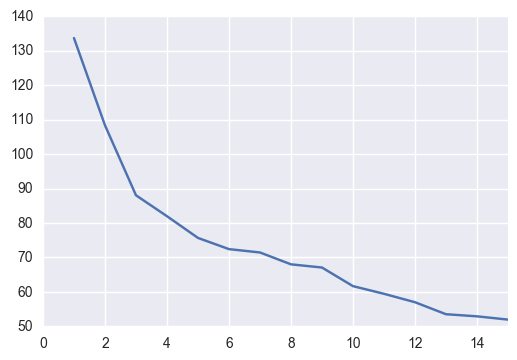

In [5]:
# # SVD to deal with sparse data
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

dtm_dense = dtm.todense()
print('Created dense dtm matrix')

centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
print('Created centered dtm')

u, s, vt = randomized_svd(centered_dtm, n_components=15, n_iter=5, random_state=None)
print('Ran randomized_svd and assigned u, s, vt')

plt.xlim([0,15])
plt.plot(range(1,len(s)+1),s)


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# fit LSA with 5 principal components
from sklearn.preprocessing import Normalizer
lsa = TruncatedSVD(5, algorithm='randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
# dist_matrix = 1 - cosine_similarity(dtm_lsa)

dfsvd = pd.DataFrame(lsa.components_,index=['comp1','comp2','comp3','comp4','comp5'],columns=terms)
dfsvd

,100,2016,actual,alreadi,america,american,amp,ask,back,ballot,...,white,wikileak,win,woman,women,work,world,would,ya,year
comp1,0.008191,0.016300,0.006086,0.005940,0.030862,0.016480,0.026985,0.007440,0.009625,0.006437,...,0.015932,0.009591,0.083851,0.005327,0.008626,0.007819,0.008845,0.015480,0.007740,0.013782
comp2,0.006876,0.004249,0.007283,0.005807,0.030167,0.015913,0.041231,0.006208,0.009380,0.001587,...,0.024150,-0.000621,0.114457,0.005272,0.010508,0.008149,0.008874,0.022360,0.005851,0.015438
comp3,0.018286,0.017564,0.008143,0.008520,0.037062,0.028482,0.076193,0.013487,0.011250,0.011379,...,0.016256,0.020361,0.091197,0.016442,0.013295,0.017925,0.010914,0.025723,0.000180,0.020325
comp4,-0.010779,0.042553,0.008209,0.011458,0.046252,0.029771,0.030196,0.004700,0.008193,0.011298,...,0.022818,-0.020760,0.017031,-0.001179,0.007047,0.005358,0.009636,0.013727,0.000277,0.023298
comp5,-0.015514,-0.043775,-0.001031,-0.003216,-0.014247,-0.000973,-0.002687,0.009470,-0.013409,0.009730,...,-0.009278,-0.016527,-0.117994,-0.001116,0.001301,-0.003228,-0.008080,0.001952,-0.001157,-0.025215


In [7]:
for i in range(5):
    top = np.argsort(vt[i])[::-1]
    topterms = [terms[top[f]] for f in range(12)]
    print(i,topterms)
    print()
    
# labels = {0 : pro-Clinton, 1 : anti-Trump, 2 : pro-Trump & anti-Hillary, 3 : go vote, 4 : general election news}

0 ['co', 'electionday', 'election2016', 'via', 'imwithh', 'video', 'victori', 'wikileak', 'twitter', 'debat', '2016', 'news']

1 ['trump', 'donald', 'co', 'presid', 'win', 'se', 'fuck', 'support', 'president', 'en', 'el', 'electionnight']

2 ['hillari', 'clinton', 'vote', 'trump', 'co', 'lie', 'win', 'support', 'wikileak', 'campaign', 'email', 'bill']

3 ['vote', 'electionday', 'trump', 'co', 'election2016', 'today', 'cast', 'imwithh', 'peopl', 'get', 'pleas', 'go']

4 ['elect', 'vote', 'hillari', 'trump', 'day', 'clinton', 'co', 'donald', 'result', '2016', 'tomorrow', 'presidenti']



In [10]:
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
# from bhtsne import tsne

# Performing k-means++ with 5 clusters
nclusters = 5
kmeans = KMeans(n_clusters=nclusters)
kmeans.fit_predict(dtm_lsa)
clusters = kmeans.labels_.tolist()

# Principal Component Analysis for 2-D Plotting
pca = PCA(n_components=2)
X = pca.fit_transform(dtm_lsa)

#### BH-TSNE
# TSNE = tsne(dtm_lsa, 2, 7) # data, no.dimensions, no.initial dimensions
# x_vals, y_vals = TSNE[:,0], TSNE[:,1]

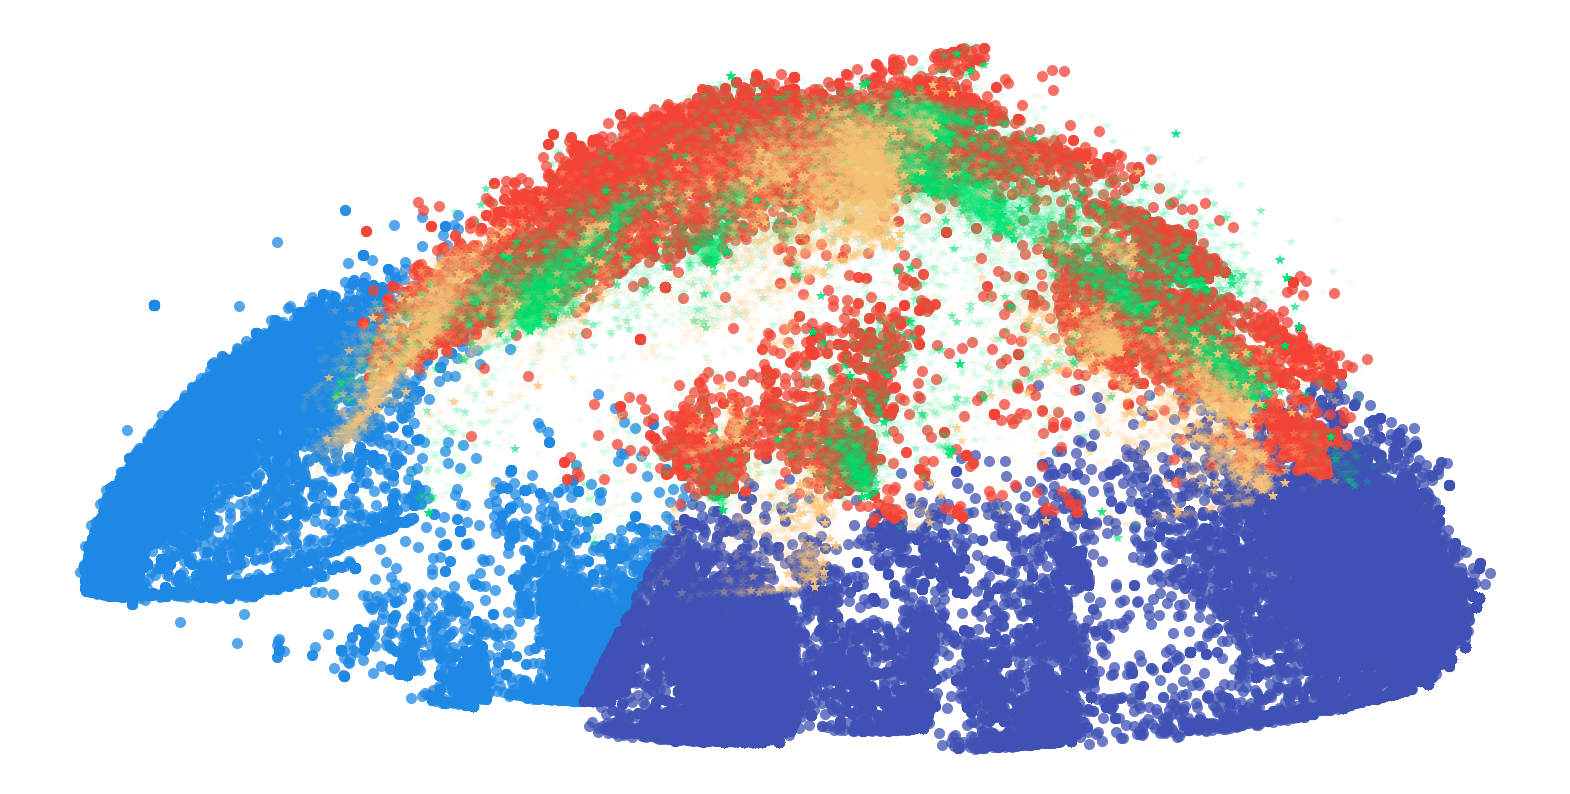

In [49]:
cluster_names = {0 : 'pro-Clinton',
                 1 : 'anti-Trump',
                 2 : 'pro-Trump / anti-Hillary',
                 3 : 'go vote',
                 4 : 'general election news'}

df = pd.DataFrame(dict(x_vals=X[:,0], y_vals=X[:,1], label=clusters)) 
#df = pd.DataFrame(dict(x=x_vals, y=y_vals, label=clusters))

# group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(20, 10)) 
ax.margins(0.05)

colors = ['#1E88E5', '#3F51B5', '#F44336', '#00E676','#FFCC80']

# plot groups 
for name, group in groups:
    if name not in [0, 1, 2]: 
        ax.plot(group.x_vals, group.y_vals, marker='*', linestyle='', ms=7, label=cluster_names[name], \
            color=colors[name], mec='none', alpha=.075)
    else:
        ax.plot(group.x_vals, group.y_vals, marker='o', linestyle='', ms=8, label=cluster_names[name], \
                color=colors[name], mec='none', alpha=.75)
        ax.set_aspect('auto')
        ax.tick_params(axis= 'x', which='both', bottom='off', top='off', labelbottom='off')
        ax.tick_params(axis= 'y', which='both', left='off', top='off', labelleft='off')
    
#legend = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=2, borderaxespad=0,prop={'size':20})
ax.set_axis_bgcolor('white')

plt.show()

In [254]:
# basic stats of clusters
print('Out of a 300,000 sample there are...')
print(str(clusters.count(0)) + ' pro-Hillary tweeters')
print(str(clusters.count(1)) + ' anti-Trump tweeters')
print(str(clusters.count(2)) + ' pro-Trump tweeters')


Out of a 300,000 sample there are...
76058 pro-Hillary tweeters
74636 anti-Trump tweeters
48333 pro-Trump tweeters
